In [9]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
X_train_origin = pd.read_csv('../data/featured_data/X_train.csv')
y_train_origin = pd.read_csv('../data/featured_data/y_train.csv')

In [3]:
X_train_origin = X_train_origin.to_numpy()
y_train_origin = y_train_origin.to_numpy()
y_train_origin = y_train_origin.ravel()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_origin, y_train_origin, test_size=0.2, random_state=1) 

In [8]:
X_train.shape

(76409, 48)

In [5]:
input_dim=X_train.shape[1]

In [11]:
model = Sequential()
model.add(Dense(64,input_dim=input_dim ,activation='relu') )
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu') )
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid')) 

In [13]:
model.summary()
# 3136=48*64+64
# 236=64*4

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 4,449
Trainable params: 4,321
Non-trainable params: 128
__________________________________________________

In [7]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt ,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
epoch=60

In [9]:
history=model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size=200, epochs=epoch, verbose=1)

Train on 76409 samples, validate on 19103 samples
Epoch 1/60
76409/76409 [==============================] - 2s 32us/sample - loss: 0.4172 - accuracy: 0.8050 - val_loss: 0.3302 - val_accuracy: 0.8455
Epoch 2/60
76409/76409 [==============================] - 1s 16us/sample - loss: 0.3346 - accuracy: 0.8468 - val_loss: 0.3059 - val_accuracy: 0.8592
Epoch 3/60
76409/76409 [==============================] - 1s 15us/sample - loss: 0.3160 - accuracy: 0.8552 - val_loss: 0.2936 - val_accuracy: 0.8661
Epoch 4/60
76409/76409 [==============================] - 1s 15us/sample - loss: 0.3041 - accuracy: 0.8635 - val_loss: 0.2850 - val_accuracy: 0.8698
Epoch 5/60
76409/76409 [==============================] - 1s 16us/sample - loss: 0.2946 - accuracy: 0.8676 - val_loss: 0.2809 - val_accuracy: 0.8719
Epoch 6/60
76409/76409 [==============================] - 1s 16us/sample - loss: 0.2897 - accuracy: 0.8700 - val_loss: 0.2765 - val_accuracy: 0.8737
Epoch 7/60
76409/76409 [==============================] 

76409/76409 [==============================] - 1s 16us/sample - loss: 0.2520 - accuracy: 0.8870 - val_loss: 0.2585 - val_accuracy: 0.8840
Epoch 56/60
76409/76409 [==============================] - 1s 16us/sample - loss: 0.2525 - accuracy: 0.8861 - val_loss: 0.2588 - val_accuracy: 0.8824
Epoch 57/60
76409/76409 [==============================] - 1s 18us/sample - loss: 0.2523 - accuracy: 0.8867 - val_loss: 0.2594 - val_accuracy: 0.8821
Epoch 58/60
76409/76409 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.88 - 1s 16us/sample - loss: 0.2528 - accuracy: 0.8859 - val_loss: 0.2591 - val_accuracy: 0.8832
Epoch 59/60
76409/76409 [==============================] - 1s 15us/sample - loss: 0.2507 - accuracy: 0.8873 - val_loss: 0.2603 - val_accuracy: 0.8816
Epoch 60/60
76409/76409 [==============================] - 1s 16us/sample - loss: 0.2518 - accuracy: 0.8868 - val_loss: 0.2593 - val_accuracy: 0.8831


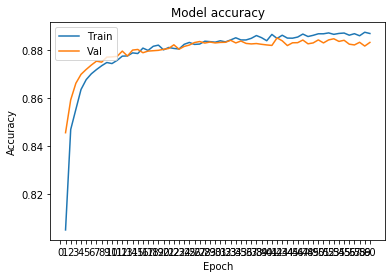

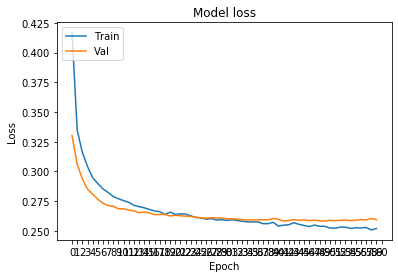

In [10]:
epoch_range=range(1,epoch+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [11]:
model.save("../models/NN.h5")